# 1) Import Libraries

In [63]:
import os
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

pd.set_option("display.max_rows", 30)
pd.set_option('max_colwidth', 400)

# 2) Scan and import directories of pictures

In [64]:
def check_location_exists(location):
    if not os.path.exists(location):
        raise FileNotFoundError('Could not find data folder, please create a folder named "Datasets" and place test, train and val folders (Seperate folders named with class names) within!\nExample: Datasets\\test\\cats\\1.jpg')

In [65]:
# Obtain Current Working Directory
currentworking_directory = os.getcwd()
currentworking_directory

'd:\\Files\\GitHub\\General_Image_Classifier'

In [66]:
# Data Directory
data_directory = currentworking_directory + "\Datasets"

In [67]:
check_location_exists(data_directory)

In [68]:
file_list = []
root_list = []
dirs_list = []
# Scan the folder for pictures
for root, dirs, files in os.walk(data_directory):
  dirs.sort()
  for name in files:
    file_list.append(os.path.join(root, name))
    root_list.append(root)
    dirs_list.append(dirs)

Data_Directory_df = pd.DataFrame(file_list, columns=['Directory'])

In [69]:
# Find index of Dataset Folder and dataset_type
split_directory = Data_Directory_df['Directory'].str.split('\\')[0]
datasetfolder_index = split_directory.index('Datasets')
datasettype_index = datasetfolder_index + 1
classtype_index =  datasetfolder_index + 2

In [70]:
Data_Directory_df['Set'] = Data_Directory_df['Directory'].str.split('\\').str[datasettype_index]

In [71]:
Data_Directory_df['Class'] = Data_Directory_df['Directory'].loc[(Data_Directory_df['Set'] == 'train') | (Data_Directory_df['Set'] == 'val')].str.split('\\').str[classtype_index]

# 3) View the Data_Directory Dataframe

In [72]:
Data_Directory_df.loc[Data_Directory_df['Set'] == 'test'].iloc[0:5]

,Directory,Set,Class
0,d:\Files\GitHub\General_Image_Classifier\Datasets\test\1.jpg,test,NaN
1,d:\Files\GitHub\General_Image_Classifier\Datasets\test\10.jpg,test,NaN
2,d:\Files\GitHub\General_Image_Classifier\Datasets\test\100.jpg,test,NaN
3,d:\Files\GitHub\General_Image_Classifier\Datasets\test\101.jpg,test,NaN
4,d:\Files\GitHub\General_Image_Classifier\Datasets\test\102.jpg,test,NaN


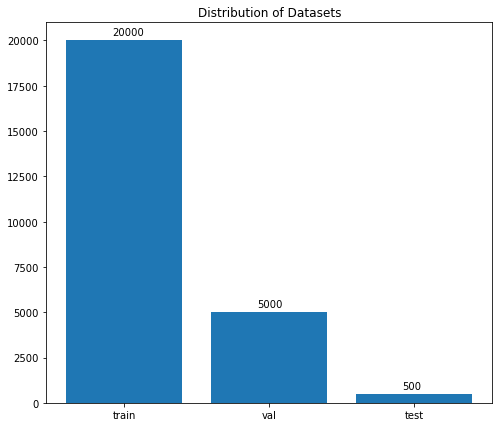

In [11]:
datasettypes_counts = Data_Directory_df.Set.value_counts()

plt.figure(figsize=(8,7))
x_labels = datasettypes_counts.keys()
plt.bar(x = x_labels, height = datasettypes_counts)
plt.title(label = 'Distribution of Datasets')
for i,j in zip(x_labels,datasettypes_counts):
    plt.annotate('%s' %j, xy=(i,j), xytext=(-12,5), textcoords='offset points')

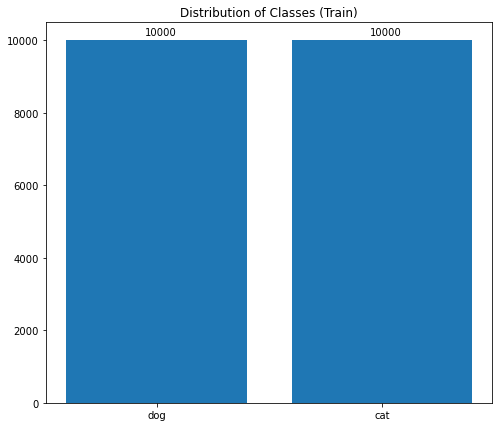

In [75]:
datasettypes_counts = Data_Directory_df.loc[Data_Directory_df.Set == 'train'].Class.value_counts()

plt.figure(figsize=(8,7))
x_labels = datasettypes_counts.keys()
plt.bar(x = x_labels, height = datasettypes_counts)
plt.title(label = 'Distribution of Classes (Train)')
for i,j in zip(x_labels,datasettypes_counts):
    plt.annotate('%s' %j, xy=(i,j), xytext=(-12,5), textcoords='offset points')

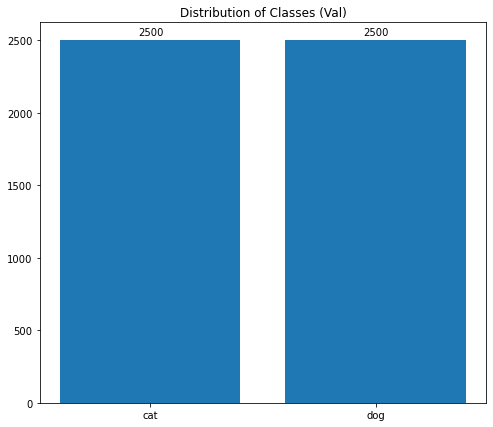

In [77]:
datasettypes_counts = Data_Directory_df.loc[Data_Directory_df.Set == 'val'].Class.value_counts()

plt.figure(figsize=(8,7))
x_labels = datasettypes_counts.keys()
plt.bar(x = x_labels, height = datasettypes_counts)
plt.title(label = 'Distribution of Classes (Val)')
for i,j in zip(x_labels,datasettypes_counts):
    plt.annotate('%s' %j, xy=(i,j), xytext=(-12,5), textcoords='offset points')

# 4) Show an image

In [12]:
def image_view(file_path): 
    im = cv2.imread(file_path)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.title(label = file_path.split("\\")[-1] + ' (' + file_path.split("\\")[-2] + ')')
    plt.axis('off')

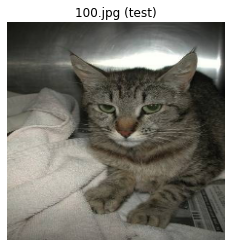

In [13]:
image_directory = Data_Directory_df['Directory'][2]
image_view(image_directory)